In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
import numpy as np # new data provide I will use array
from sklearn.model_selection import train_test_split # used to split the data 
import matplotlib.pyplot as plt # there is some thing to plot
%matplotlib inline
import seaborn as sns #  EDA 
from joblib import dump # used to export the model and use it






<h1>Load the data set </h1>

In [7]:
df=pd.read_csv('./data/User_Data.csv')
df 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### check the data 

In [8]:
df.shape

(400, 5)

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [13]:
df['Gender']=df['Gender'].replace(to_replace={'Male':1,'Female':0})
df['Gender']
df

/tmp/ipykernel_7574/1635660735.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace(to_replace={'Male':1,'Female':0})


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


### Feature Selection

In [14]:
# separate dependent and Indepent Variable
X=df[['Gender','Age','EstimatedSalary']]
Y=df[['Purchased']]

In [15]:
print(X,Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]      Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


### Split the data 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(x_train,y_test)

     Gender  Age  EstimatedSalary
205       0   47            47000
354       1   36            99000
3         0   27            57000
264       1   48            90000
194       1   28            89000
..      ...  ...              ...
299       1   46           117000
22        1   48            41000
72        0   20            23000
15        1   29            80000
168       1   29           148000

[320 rows x 3 columns]      Purchased
94           0
32           0
225          0
157          0
356          1
..         ...
188          0
223          1
65           0
262          1
186          0

[80 rows x 1 columns]


In [17]:
from sklearn.preprocessing import StandardScaler
st_sc=StandardScaler()
x_train=st_sc.fit_transform(x_train)
x_test=st_sc.fit_transform(x_test)
print(x_train,x_test)

[[-0.97530483  0.88928823 -0.65924556]
 [ 1.02532046 -0.17254846  0.87392651]
 [-0.97530483 -1.04132394 -0.36440478]
 [ 1.02532046  0.98581884  0.6085698 ]
 [ 1.02532046 -0.94479333  0.57908572]
 [-0.97530483  0.40663519  0.01888824]
 [ 1.02532046  0.98581884  2.11225779]
 [ 1.02532046  0.31010458 -0.30543662]
 [ 1.02532046  1.7580637  -0.27595254]
 [ 1.02532046 -0.17254846  2.20071003]
 [-0.97530483  1.7580637   1.0213469 ]
 [ 1.02532046 -1.33091576 -1.48479975]
 [-0.97530483  2.04765553  0.54960165]
 [-0.97530483  1.27541066  1.90586924]
 [ 1.02532046 -1.13785454  0.31372902]
 [-0.97530483 -0.36560968 -0.77718187]
 [ 1.02532046 -1.71703819  0.49063349]
 [ 1.02532046 -0.5586709  -1.51428383]
 [ 1.02532046  0.31010458 -0.71821372]
 [-0.97530483  0.02051275 -0.57079333]
 [ 1.02532046  0.02051275  0.04837232]
 [ 1.02532046 -0.07601785 -0.51182517]
 [ 1.02532046 -0.6552015  -1.51428383]
 [-0.97530483  0.02051275  0.31372902]
 [-0.97530483  0.31010458  0.07785639]
 [ 1.02532046 -0.46214029

In [18]:
# applay the Algorihtm 
model=LogisticRegression()
model.fit(x_train,y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
# testing 
Y_pred=model.predict(x_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [20]:
# Model Evaluation
from  sklearn.metrics import confusion_matrix ,accuracy_score
cm=confusion_matrix(y_test,Y_pred)
cm

array([[45,  3],
       [13, 19]])

In [21]:
accuracy=accuracy_score(y_test,Y_pred)
print(f"Accuracuy Score {accuracy} ")

Accuracuy Score 0.8 


<Axes: >

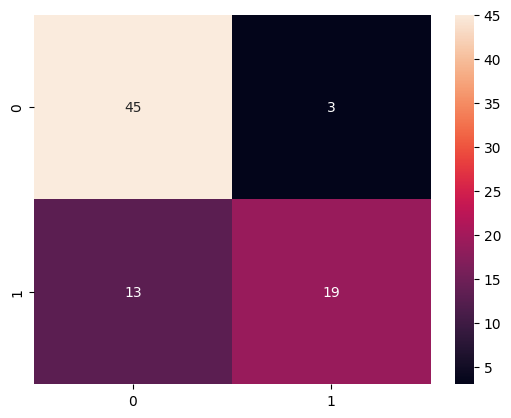

In [22]:
sns.heatmap(cm,annot=True)

In [23]:
dump(model,'LRM.joblib') # save this model to my computer


['LRM.joblib']

In [24]:
# how to use the model
from joblib import load
Loaded_model=load('LRM.joblib')

new_data =np.array([[-0.956557,  1.546,  1.0454 ]])
result=Loaded_model.predict(new_data)
print(result)

[1]


In [25]:
age=20
salary=34400
gender=1
x_d=np.array([[gender,age,salary]])
x_d=st_sc.fit_transform(x_d)


In [26]:
result=Loaded_model.predict(x_d)
print(f"The person with age of  {age} salary of  {salary}  Gender of  {gender} ")
if result == 0:
    print("Will Not Buy Car")
else:
    print("Will buy car ")

The person with age of  20 salary of  34400  Gender of  1 
Will Not Buy Car
